In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('NEWS.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,Unnamed: 0,url,Date,ID,Age of Poast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days
0,0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,1,data_channel_is_entertainment,weekday_is_monday
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,1,data_channel_is_bus,weekday_is_monday
2,2,http://mashable.com/2013/01/07/apple-40-billio...,2013/01/07,appM3,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,0,0,1,0,0,0,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.857143,0.142857,0.323333,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1,data_channel_is_bus,weekday_is_monday
3,3,http://mashable.com/2013/01/07/astronaut-notre...,2013/01/07,astM4,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,0,1,0,0,0,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.666667,0.333333,0.100705,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,1,data_channel_is_entertainment,weekday_is_monday
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,2013/01/07,attM5,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,0,0,0,0,1,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.012127,0.860215,0.139785,0.281003,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,1,data_channel_is_tech,weekday_is_monday


In [4]:
df.columns=df.columns.str.replace(' ','') 

In [5]:
# df = df.drop(columns = ['url','timedelta'])

In [197]:
df.columns

Index(['Unnamed:0', 'url', 'Date', 'ID', 'AgeofPoast', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words',
       'global_sentiment_polarity', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_titl

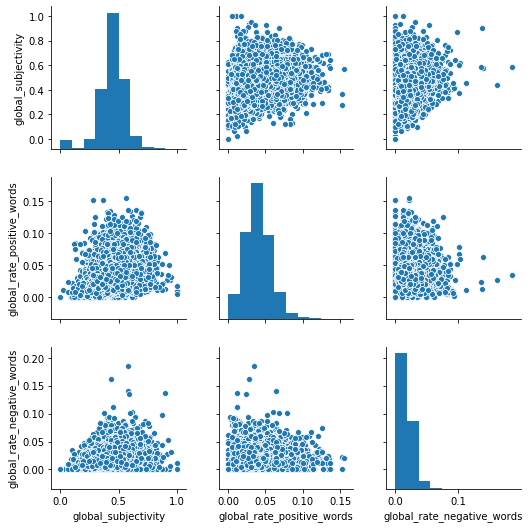

In [202]:
a = df[['global_subjectivity',
       'global_rate_positive_words', 'global_rate_negative_words']]
sns.pairplot(a)

# Analysing columns individually

## shares

In [6]:
df['shares'].describe()

count    39336.000000
mean      2755.416260
std       3949.651794
min          1.000000
25%        942.000000
50%       1400.000000
75%       2700.000000
max      38200.000000
Name: shares, dtype: float64

In [7]:
df['shares'].shape

(39336,)

(array([ 242., 1230., 4902., 6050., 6066., 4052., 1902., 2245., 1648.,
        1318.]),
 array([1.0000e+00, 2.7090e+02, 5.4080e+02, 8.1070e+02, 1.0806e+03,
        1.3505e+03, 1.6204e+03, 1.8903e+03, 2.1602e+03, 2.4301e+03,
        2.7000e+03]),
 <a list of 10 Patch objects>)

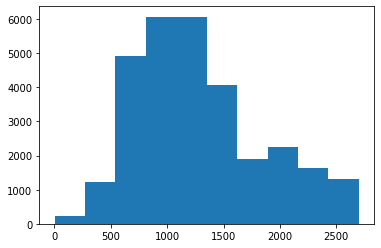

In [8]:
plt.hist(df['shares'][df['shares']<2800])

In [9]:
5800/39644

0.1463020885884371

only 15% of the data have got 2800 number of shares

# Hypothesis testing

H0 : Bn is not influencing number of shares (Bn = 0)

Ha : Bn is influencing number of shares (Bn != 0)

#  n_tokens_title

In [10]:
df['n_tokens_title'].describe()

count    39336.000000
mean        10.395388
std          2.112458
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

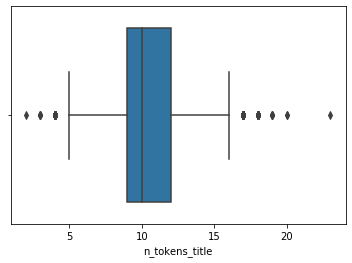

In [11]:
sns.boxplot(df['n_tokens_title'])

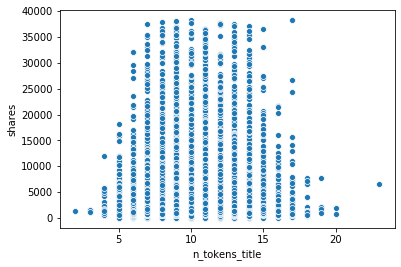

In [12]:
sns.scatterplot(df['n_tokens_title'],df['shares'])

In [13]:
model = ols('shares~n_tokens_title',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.762
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0524
Time:                        15:02:42   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2945.4901     99.998     29.455      0.000    2749.491    3141.490
n_tokens_title   -18.2844      9.427     -1.940      0.052     -36.761       0.192
==============================================================================
Omnibus:                    33602.538   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886158.471
Skew:                           4.151   Prob(JB):                         0.00
Kurtosis:                      24.720   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of tokens in title is not influencing shares

# n_tokens_content 

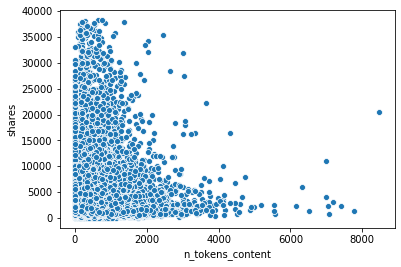

In [15]:
sns.scatterplot(df['n_tokens_content'],df['shares'])

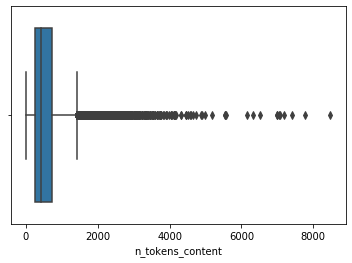

In [16]:
sns.boxplot(df['n_tokens_content'])

n_tokens_content must be in the range of 0 - 1600 to get 1.8L shares

In [17]:
model = ols('shares~n_tokens_content',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2257
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.635
Time:                        15:02:43   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2744.4214     30.533     89.883      0.000    2684.576    2804.267
n_tokens_content     0.0201      0.042      0.475      0.635      -0.063       0.103
==============================================================================
Omnibus:                    33594.262   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885220.232
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.707   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of tokens content is not influencing shares

# n_unique_tokens 

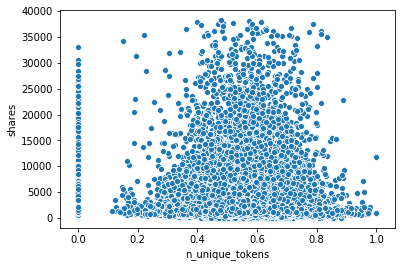

In [19]:
sns.scatterplot(df['n_unique_tokens'][df['n_unique_tokens']<100],df['shares'])

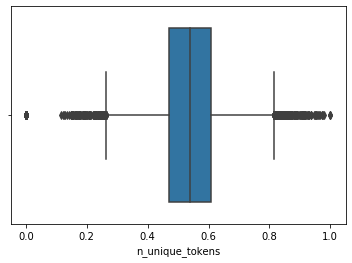

In [20]:
sns.boxplot(df['n_unique_tokens'][df['n_unique_tokens']<100])

In [21]:
model = ols('shares~n_unique_tokens',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3943
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.530
Time:                        15:02:44   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2753.4764     20.153    136.632      0.000    2713.977    2792.976
n_unique_tokens     3.5383      5.634      0.628      0.530      -7.505      14.582
==============================================================================
Omnibus:                    33591.846   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884980.804
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         3.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of unique tokens is not influencing shares

# n_non_stop_words 

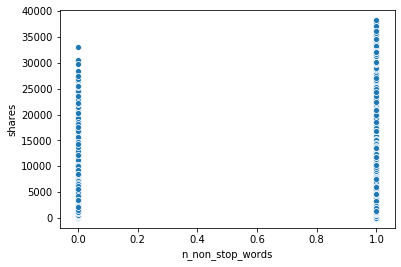

In [23]:
sns.scatterplot(df['n_non_stop_words'][df['n_non_stop_words']<10],df['shares'])

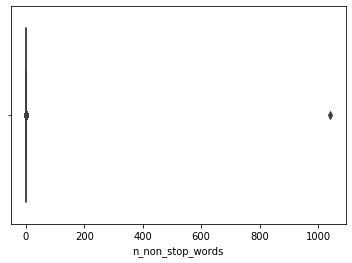

In [24]:
sns.boxplot(df['n_non_stop_words'])

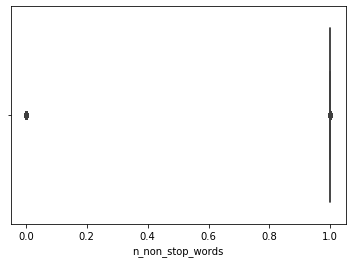

In [25]:
sns.boxplot(df['n_non_stop_words'][df['n_non_stop_words']<100])

In [26]:
df['n_non_stop_words'].describe()

count    39336.000000
mean         0.996822
std          5.251636
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

In [27]:
model = ols('shares~n_non_stop_words',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3266
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.568
Time:                        15:02:45   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2753.2561     20.270    135.829      0.000    2713.526    2792.986
n_non_stop_words     2.1670      3.792      0.571      0.568      -5.266       9.600
==============================================================================
Omnibus:                    33591.917   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884987.324
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
 # p_vales > 0.05 Hence; H0 is accepted. ie., Number of non stop words is not influencing shares

# 'n_non_stop_unique_tokens'

In [29]:
df['n_non_stop_unique_tokens'].describe()

count    39336.000000
mean         0.689331
std          3.277532
min          0.000000
25%          0.625806
50%          0.690411
75%          0.754545
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

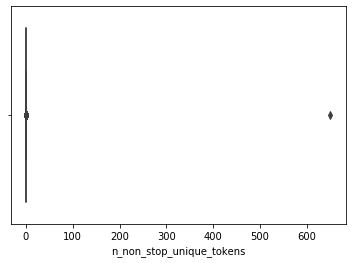

In [30]:
sns.boxplot(df['n_non_stop_unique_tokens'])

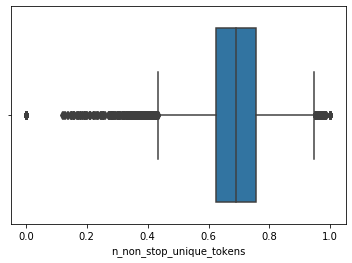

In [31]:
sns.boxplot(df['n_non_stop_unique_tokens'][df['n_non_stop_unique_tokens']<100])

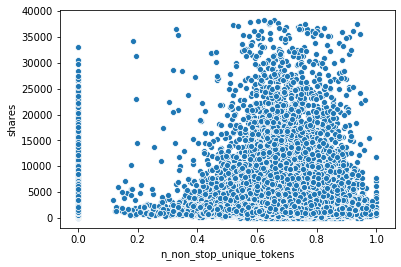

In [32]:
sns.scatterplot(df['n_non_stop_unique_tokens'][df['n_non_stop_unique_tokens']<10],df['shares'])

In [33]:
model = ols('shares~n_non_stop_unique_tokens',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1478
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.701
Time:                        15:02:46   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2753.8062     20.350    135.321      0.000    2713.919    2793.693
n_non_stop_unique_tokens     2.3356      6.076      0.384      0.701      -9.574      14.245
==============================================================================
Omnibus:                    33591.654   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884963.650
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         3.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of non stop unique tokes is not influencing shares

# num_hrefs

In [35]:
df['num_hrefs'].describe()

count    39336.000000
mean        10.853595
std         11.271423
min          0.000000
25%          4.000000
50%          7.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

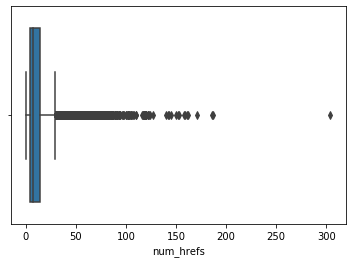

In [36]:
sns.boxplot(df['num_hrefs'])

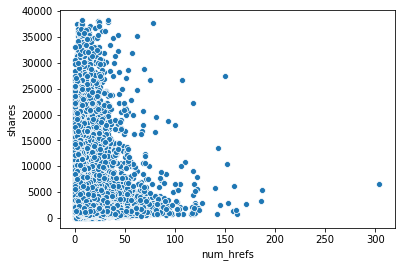

In [37]:
sns.scatterplot(df['num_hrefs'],df['shares'])

In [38]:
model = ols('shares~num_hrefs',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     238.9
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           9.69e-54
Time:                        15:02:46   Log-Likelihood:            -3.8145e+05
No. Observations:               39336   AIC:                         7.629e+05
Df Residuals:                   39334   BIC:                         7.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2459.8941     27.563     89.247      0.000    2405.870    2513.918
num_hrefs     27.2280      1.761     15.457      0.000      23.775      30.681
==============================================================================
Omnibus:                    33552.805   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883914.722
Skew:                           4.142   Prob(JB):                         0.00
Kurtosis:                      24.695   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# p_vales < 0.05 Hence; Ha is accepted. ie., Number of hrefs is influencing shares

# num_self_hrefs

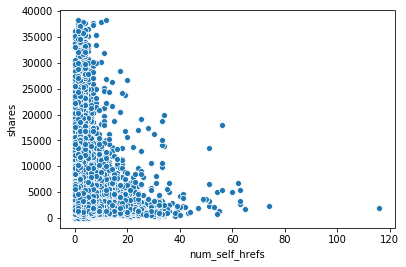

In [40]:
sns.scatterplot(df['num_self_hrefs'],df['shares'])

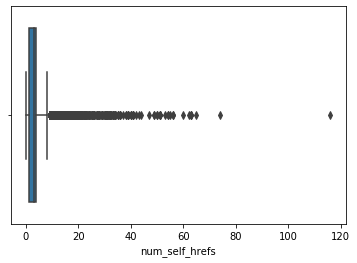

In [41]:
sns.boxplot(df['num_self_hrefs'])

In [42]:
model = ols('shares~num_self_hrefs',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4697
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.493
Time:                        15:02:47   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2743.7552     26.194    104.749      0.000    2692.415    2795.095
num_self_hrefs     3.5376      5.162      0.685      0.493      -6.580      13.655
==============================================================================
Omnibus:                    33595.356   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885339.855
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.709   Cond. No.                         6.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of self hrefs is not influencing shares

# num_imgs

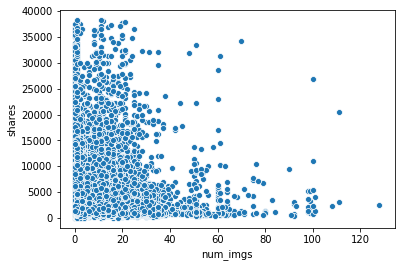

In [44]:
sns.scatterplot(df['num_imgs'],df['shares'])

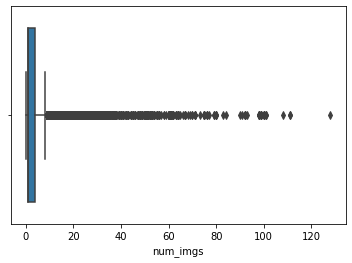

In [45]:
sns.boxplot(df['num_imgs'])

In [46]:
model = ols('shares~num_imgs',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.08e-55
Time:                        15:02:48   Log-Likelihood:            -3.8145e+05
No. Observations:               39336   AIC:                         7.629e+05
Df Residuals:                   39334   BIC:                         7.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2585.3363     22.614    114.323      0.000    2541.012    2629.661
num_imgs      37.5626      2.392     15.705      0.000      32.875      42.251
==============================================================================
Omnibus:                    33482.015   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           877779.964
Skew:                           4.130   Prob(JB):                         0.00
Kurtosis:                      24.618   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# p_vales < 0.05 Hence; Ha is accepted. ie., Number of images is influencing shares

# num_videos

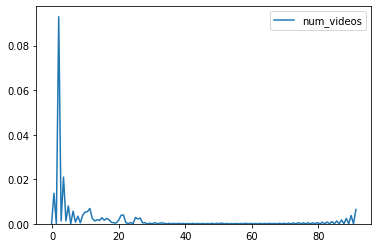

In [48]:
sns.kdeplot(df['num_videos'])

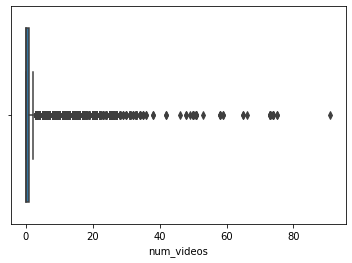

In [49]:
sns.boxplot(df['num_videos'])

In [50]:
df['num_videos'].describe()

count    39336.000000
mean         1.244000
std          4.104421
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

In [51]:
df['num_videos'].describe()

count    39336.000000
mean         1.244000
std          4.104421
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

In [52]:
model = ols('shares~num_videos',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     48.84
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.82e-12
Time:                        15:02:48   Log-Likelihood:            -3.8155e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2713.2610     20.796    130.469      0.000    2672.500    2754.022
num_videos    33.8868      4.849      6.988      0.000      24.383      43.391
==============================================================================
Omnibus:                    33567.410   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884223.038
Skew:                           4.145   Prob(JB):                         0.00
Kurtosis:                      24.697   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# p_vales < 0.05 Hence; Ha is accepted. ie., Number of videos is influencing shares

# average_token_length

In [54]:
df['average_token_length'].describe()

count    39336.000000
mean         4.549147
std          0.842608
min          0.000000
25%          4.478584
50%          4.664430
75%          4.854989
max          8.041534
Name: average_token_length, dtype: float64

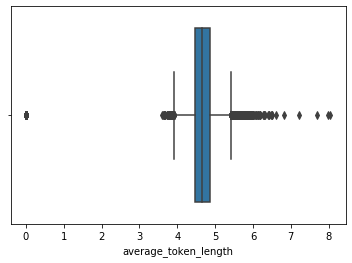

In [55]:
sns.boxplot(df['average_token_length'])

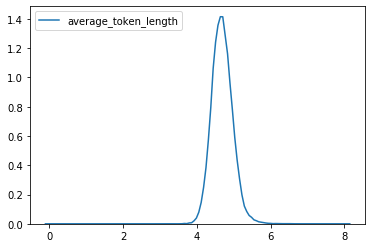

In [56]:
sns.kdeplot(df['average_token_length'])

In [57]:
model = ols('shares~average_token_length',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     64.48
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.00e-15
Time:                        15:02:49   Log-Likelihood:            -3.8154e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3618.0365    109.257     33.115      0.000    3403.891    3832.182
average_token_length  -189.6224     23.615     -8.030      0.000    -235.909    -143.336
==============================================================================
Omnibus:                    33580.205   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885752.267
Skew:                           4.147   Prob(JB):                         0.00
Kurtosis:                      24.717   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# p_vales < 0.05 Hence; Ha is accepted. ie., Average token length is influencing shares

# num_keywords

In [59]:
df['num_keywords'].describe()

count    39336.000000
mean         7.221883
std          1.910249
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64

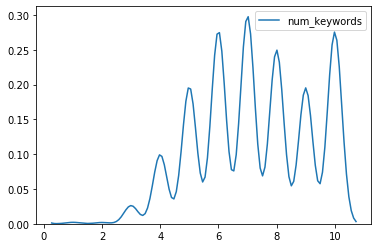

In [60]:
sns.kdeplot(df['num_keywords'])

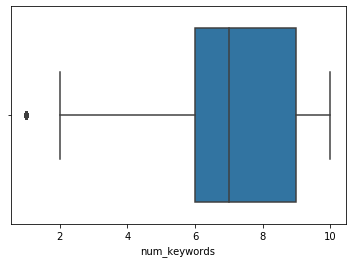

In [61]:
sns.boxplot(df['num_keywords'])

In [62]:
model = ols('shares~num_keywords',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     61.02
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.80e-15
Time:                        15:02:49   Log-Likelihood:            -3.8154e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2167.7638     77.819     27.857      0.000    2015.238    2320.290
num_keywords    81.3711     10.417      7.811      0.000      60.953     101.789
==============================================================================
Omnibus:                    33615.546   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           888269.937
Skew:                           4.153   Prob(JB):                         0.00
Kurtosis:                      24.748   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# p_vales < 0.05 Hence; Ha is accepted. ie., number of keywords is influencing shares

# 'data_channel_is_lifestyle'

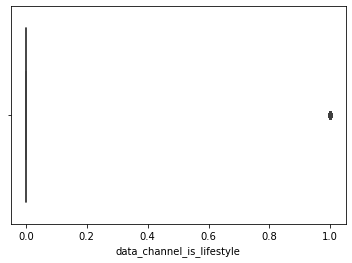

In [64]:
sns.boxplot(df['data_channel_is_lifestyle'])

In [65]:
df['data_channel_is_lifestyle'].value_counts()

0    37252
1     2084
Name: data_channel_is_lifestyle, dtype: int64

In [66]:
model = ols('shares~data_channel_is_lifestyle',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.94
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.82e-06
Time:                        15:02:49   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2733.3587     20.458    133.607      0.000    2693.260    2773.457
data_channel_is_lifestyle   416.3424     88.882      4.684      0.000     242.131     590.554
==============================================================================
Omnibus:                    33596.812   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885884.813
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.717   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 'kw_min_min'
Worst keyword (min. shares) 

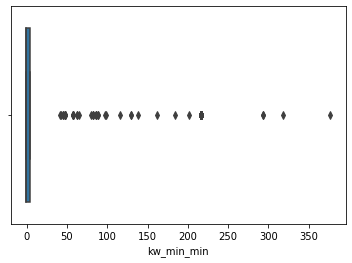

In [67]:
sns.boxplot(df['kw_min_min'])

In [68]:
df['kw_min_min'].describe()

count    39336.000000
mean        26.175361
std         69.711788
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

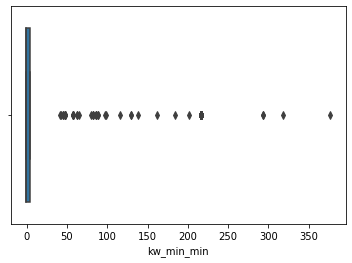

In [69]:
sns.boxplot(df['kw_min_min'])

In [70]:
model = ols('shares~kw_min_min',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.538
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0600
Time:                        15:02:50   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2741.3526     21.271    128.877      0.000    2699.661    2783.044
kw_min_min     0.5373      0.286      1.881      0.060      -0.023       1.097
==============================================================================
Omnibus:                    33594.241   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885120.813
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.706   Cond. No.                         79.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# p_vales > 0.05 Hence; H0 is accepted. ie., Number of non stop unique tokes is not influencing shares

In [72]:
df['kw_max_min'].describe()

count     39336.000000
mean       1150.586229
std        3814.135907
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64

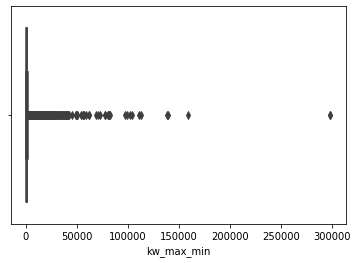

In [73]:
sns.boxplot(df['kw_max_min'])

In [74]:
model = ols('shares~kw_max_min',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.10
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.44e-10
Time:                        15:02:50   Log-Likelihood:            -3.8155e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2717.3922     20.790    130.705      0.000    2676.643    2758.142
kw_max_min     0.0330      0.005      6.333      0.000       0.023       0.043
==============================================================================
Omnibus:                    33574.964   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884673.600
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.703   Cond. No.                     4.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_max_min is  influencing shares

# kw_avg_min

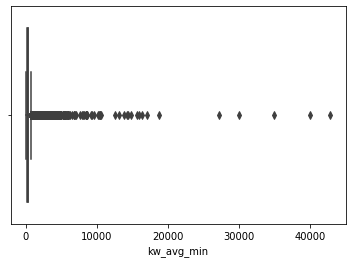

In [76]:
sns.boxplot(df['kw_avg_min'])

In [77]:
model = ols('shares~kw_avg_min',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     50.02
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.55e-12
Time:                        15:02:50   Log-Likelihood:            -3.8155e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2683.8151     22.329    120.195      0.000    2640.050    2727.580
kw_avg_min     0.2295      0.032      7.072      0.000       0.166       0.293
==============================================================================
Omnibus:                    33578.023   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885192.602
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.710   Cond. No.                         772.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_avg_min is  influencing shares

# kw_min_max

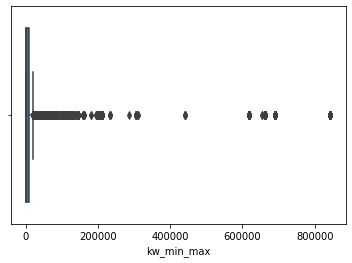

In [79]:
sns.boxplot(df['kw_min_max'])

In [80]:
model = ols('shares~kw_min_max',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.11
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00148
Time:                        15:02:51   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2740.5938     20.450    134.012      0.000    2700.511    2780.677
kw_min_max     0.0011      0.000      3.180      0.001       0.000       0.002
==============================================================================
Omnibus:                    33578.718   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883522.696
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      24.685   Cond. No.                     6.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# p_vales > 0.05 Hence; H0 is accepted. ie., kw_min_max is  not influencing shares

# 'kw_max_max'

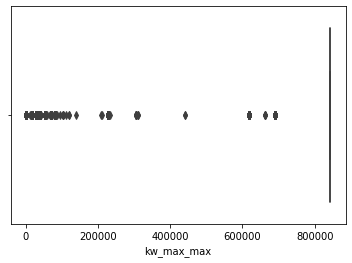

In [82]:
sns.boxplot(df['kw_max_max'])

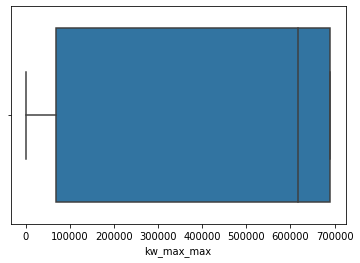

In [83]:
sns.boxplot(df['kw_max_max'][df['kw_max_max']<800000])

In [84]:
df['kw_max_max'].describe() # What is this ? 

count     39336.000000
mean     752053.363331
std      214773.547849
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

In [85]:
df['kw_max_max'].value_counts()

843300    29942
690400     3965
617900     2254
69100      1258
51900       827
80400       398
39400       148
28000       131
37400       121
17100       101
0            79
227300       70
306100        8
104100        5
663600        4
118700        2
441000        2
73100         2
67500         2
310800        2
93800         1
35800         1
208300        1
233400        1
15000         1
57600         1
86200         1
111300        1
139600        1
41600         1
53100         1
11100         1
27700         1
210300        1
18200         1
Name: kw_max_max, dtype: int64

In [86]:
df['kw_max_max'].describe()

count     39336.000000
mean     752053.363331
std      214773.547849
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

In [87]:
model = ols('shares~kw_max_max',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.176
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.140
Time:                        15:02:51   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2652.5549     72.520     36.577      0.000    2510.415    2794.695
kw_max_max     0.0001   9.27e-05      1.475      0.140    -4.5e-05       0.000
==============================================================================
Omnibus:                    33585.527   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884423.723
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      24.697   Cond. No.                     2.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# p_vales > 0.05 Hence; H0 is accepted. ie., kw_max_max is  not influencing shares

# 'kw_avg_max'


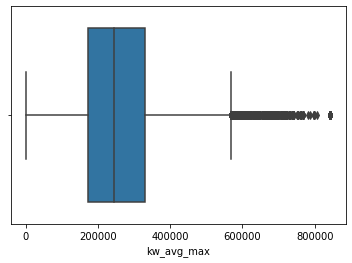

In [89]:
sns.boxplot(df['kw_avg_max'])

In [90]:
model = ols('shares~kw_avg_max',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.85e-28
Time:                        15:02:51   Log-Likelihood:            -3.8151e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2334.4845     43.017     54.269      0.000    2250.170    2418.799
kw_avg_max     0.0016      0.000     11.035      0.000       0.001       0.002
==============================================================================
Omnibus:                    33492.594   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876783.681
Skew:                           4.133   Prob(JB):                         0.00
Kurtosis:                      24.602   Cond. No.                     6.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_avg_max is influencing shares

# 'kw_min_avg' 

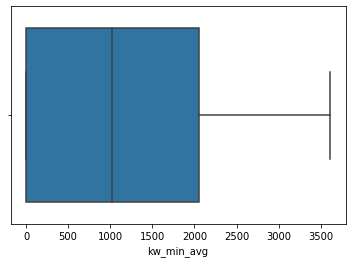

In [92]:
sns.boxplot(df['kw_min_avg'])

In [93]:
df['kw_min_avg'].describe()

count    39336.000000
mean      1115.340617
std       1135.322141
min         -1.000000
25%          0.000000
50%       1023.416667
75%       2052.710829
max       3613.039820
Name: kw_min_avg, dtype: float64

In [94]:
model = ols('shares~kw_min_avg',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     251.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.75e-56
Time:                        15:02:52   Log-Likelihood:            -3.8145e+05
No. Observations:               39336   AIC:                         7.629e+05
Df Residuals:                   39334   BIC:                         7.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2446.0847     27.828     87.900      0.000    2391.541    2500.628
kw_min_avg     0.2773      0.017     15.862      0.000       0.243       0.312
==============================================================================
Omnibus:                    33573.860   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885996.003
Skew:                           4.145   Prob(JB):                         0.00
Kurtosis:                      24.722   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_min_avg is influencing shares

# kw_max_avg 

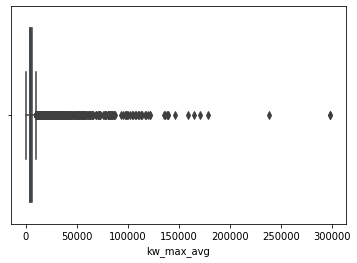

In [96]:
sns.boxplot(df['kw_max_avg'])

In [97]:
model = ols('shares~kw_max_avg',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     391.9
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           8.30e-87
Time:                        15:02:52   Log-Likelihood:            -3.8138e+05
No. Observations:               39336   AIC:                         7.628e+05
Df Residuals:                   39334   BIC:                         7.628e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.6943     27.091     88.209      0.000    2336.595    2442.794
kw_max_avg     0.0649      0.003     19.797      0.000       0.058       0.071
==============================================================================
Omnibus:                    33396.713   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           878152.965
Skew:                           4.112   Prob(JB):                         0.00
Kurtosis:                      24.637   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_max_avg is influencing shares

# 'kw_avg_avg'

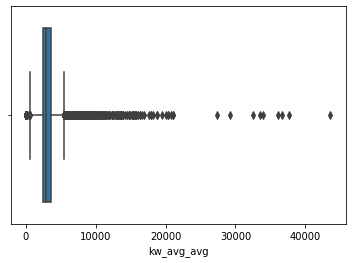

In [99]:
sns.boxplot(df['kw_avg_avg'])

In [100]:
model = ols('shares~kw_avg_avg',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1394.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          6.34e-300
Time:                        15:02:52   Log-Likelihood:            -3.8089e+05
No. Observations:               39336   AIC:                         7.618e+05
Df Residuals:                   39334   BIC:                         7.618e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1005.6262     50.782     19.803      0.000     906.091    1105.161
kw_avg_avg     0.5595      0.015     37.341      0.000       0.530       0.589
==============================================================================
Omnibus:                    33109.597   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873049.867
Skew:                           4.054   Prob(JB):                         0.00
Kurtosis:                      24.609   Cond. No.                     8.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# p_vales < 0.05 Hence; Ha is accepted. ie., kw_avg_avg is influencing shares

# 'self_reference_min_shares' 

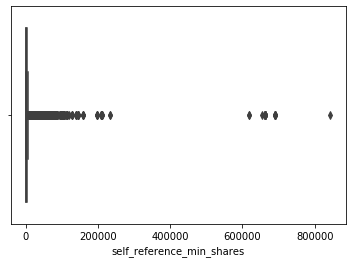

In [102]:
sns.boxplot(df['self_reference_min_shares'])

In [103]:
model = ols('shares~self_reference_min_shares',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.40e-31
Time:                        15:02:52   Log-Likelihood:            -3.8150e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2708.7622     20.279    133.574      0.000    2669.015    2748.510
self_reference_min_shares     0.0118      0.001     11.656      0.000       0.010       0.014
==============================================================================
Omnibus:                    33535.418   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884034.636
Skew:                           4.138   Prob(JB):                         0.00
Kurtosis:                      24.700   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# p_vales < 0.05 Hence; Ha is accepted. ie., 'self_reference_min_shares' is influencing shares

#  'self_reference_max_shares'

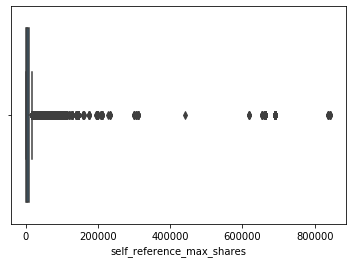

In [105]:
sns.boxplot(df['self_reference_max_shares'])

In [106]:
model = ols('shares~self_reference_max_shares',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.63e-26
Time:                        15:02:52   Log-Likelihood:            -3.8151e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2702.2187     20.502    131.803      0.000    2662.034    2742.403
self_reference_max_shares     0.0052      0.000     10.664      0.000       0.004       0.006
==============================================================================
Omnibus:                    33575.958   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885691.626
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.717   Cond. No.                     4.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# p_vales < 0.05 Hence; Ha is accepted. ie., 'self_reference_max_shares' is influencing shares

#        'self_reference_avg_sharess' 

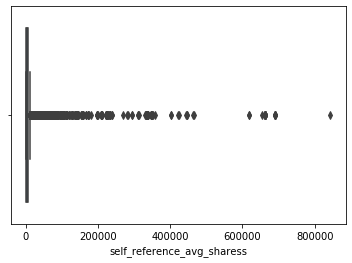

In [108]:
sns.boxplot(df['self_reference_avg_sharess'])

In [109]:
model = ols('shares~self_reference_avg_sharess',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           4.83e-40
Time:                        15:02:53   Log-Likelihood:            -3.8148e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2686.2029     20.544    130.752      0.000    2645.936    2726.470
self_reference_avg_sharess     0.0109      0.001     13.260      0.000       0.009       0.013
==============================================================================
Omnibus:                    33532.751   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883962.750
Skew:                           4.137   Prob(JB):                         0.00
Kurtosis:                      24.699   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# p_vales < 0.05 Hence; Ha is accepted. ie., 'self_reference_avg_sharess' is influencing shares

# weekdays & weekend

In [111]:
model = ols('shares~weekday_is_monday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0008499
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.977
Time:                        15:02:53   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2755.6768     21.828    126.244      0.000    2712.893    2798.461
weekday_is_monday    -1.5542     53.310     -0.029      0.977    -106.042     102.934
==============================================================================
Omnibus:                    33591.281   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884926.327
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         2.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
model = ols('shares~weekday_is_tuesday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000244
Time:                        15:02:53   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2790.3847     22.074    126.408      0.000    2747.118    2833.651
weekday_is_tuesday  -187.6050     51.130     -3.669      0.000    -287.820     -87.390
==============================================================================
Omnibus:                    33591.645   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884982.301
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model = ols('shares~weekday_is_wednesday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.28
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000158
Time:                        15:02:53   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2791.5827     22.091    126.365      0.000    2748.283    2834.882
weekday_is_wednesday  -192.7181     50.995     -3.779      0.000    -292.670     -92.766
==============================================================================
Omnibus:                    33598.455   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885828.326
Skew:                           4.151   Prob(JB):                         0.00
Kurtosis:                      24.715   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model = ols('shares~weekday_is_thursday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.46
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00122
Time:                        15:02:53   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2785.9430     22.035    126.433      0.000    2742.754    2829.132
weekday_is_thursday  -166.4308     51.450     -3.235      0.001    -267.275     -65.587
==============================================================================
Omnibus:                    33592.279   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885079.720
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.706   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model = ols('shares~weekday_is_friday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08613
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.769
Time:                        15:02:53   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2757.8116     21.522    128.139      0.000    2715.628    2799.995
weekday_is_friday   -16.6558     56.753     -0.293      0.769    -127.892      94.581
==============================================================================
Omnibus:                    33591.141   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884931.309
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
model = ols('shares~weekday_is_saturday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     74.41
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           6.57e-18
Time:                        15:02:53   Log-Likelihood:            -3.8153e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2711.3189     20.542    131.990      0.000    2671.056    2751.581
weekday_is_saturday   712.0752     82.546      8.626      0.000     550.283     873.868
==============================================================================
Omnibus:                    33613.914   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886679.303
Skew:                           4.153   Prob(JB):                         0.00
Kurtosis:                      24.725   Cond. No.                         4.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
model = ols('shares~weekday_is_sunday',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     74.84
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.30e-18
Time:                        15:02:53   Log-Likelihood:            -3.8153e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2708.5159     20.621    131.347      0.000    2668.098    2748.934
weekday_is_sunday   678.5121     78.433      8.651      0.000     524.781     832.243
==============================================================================
Omnibus:                    33626.923   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889331.302
Skew:                           4.155   Prob(JB):                         0.00
Kurtosis:                      24.761   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model = ols('shares~is_weekend',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     160.7
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           9.26e-37
Time:                        15:02:53   Log-Likelihood:            -3.8149e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2657.5682     21.320    124.652      0.000    2615.781    2699.356
is_weekend   746.6447     58.893     12.678      0.000     631.212     862.077
==============================================================================
Omnibus:                    33653.772   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891595.264
Skew:                           4.159   Prob(JB):                         0.00
Kurtosis:                      24.790   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# p_vales < 0.05 Hence; 
# Ha is accepted. ie., 
# 'weekday_is_monday'   is influencing shares
# 'weekday_is_thursday'   is influencing shares
# 'weekday_is_saturday'   is influencing shares
# 'weekday_is_weekend'   is influencing shares

In [120]:
# p_vales > 0.05 Hence; 
# Ha is accepted. ie., 
# 'weekday_is_tuesday'   is not influencing shares
# 'weekday_is_wednseday'   is not influencing shares
# 'weekday_is_friday'   is not influencing shares
# 'weekday_is_sunday'   is not influencing shares

But on wednesday chances of article getting highest number of shares is more

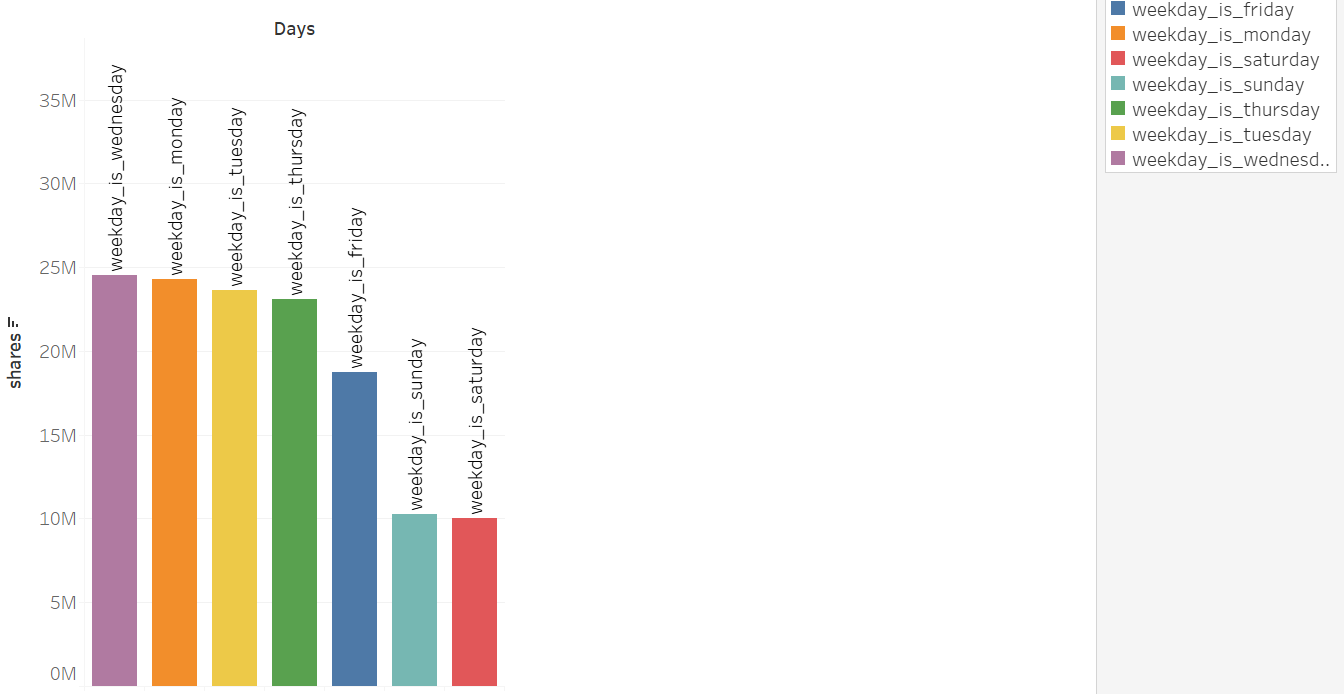

In [121]:
from PIL import Image
img  = Image.open('weekdays.png')  
img

# LDA

In [122]:
a  = ['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']


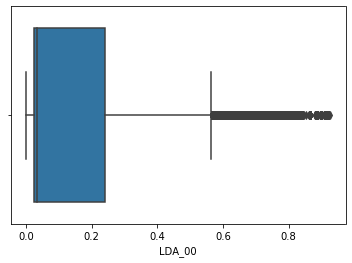

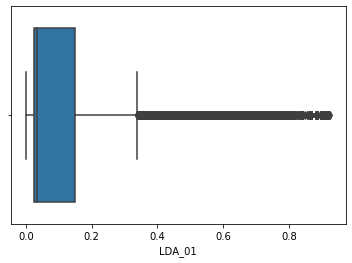

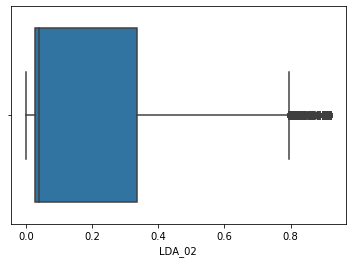

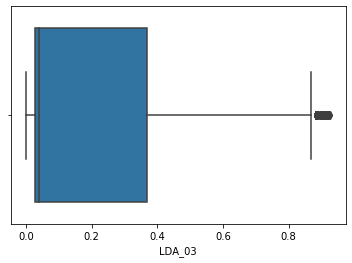

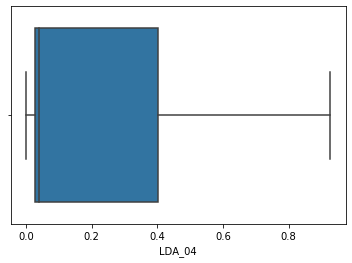

In [123]:
for i in a:
    sns.boxplot(df[i])
    plt.show()

In [124]:
model = ols('shares~LDA_00',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.628
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0568
Time:                        15:02:54   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2782.0595     24.335    114.322      0.000    2734.362    2829.757
LDA_00      -144.1327     75.669     -1.905      0.057    -292.447       4.181
==============================================================================
Omnibus:                    33569.834   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883001.041
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.679   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model = ols('shares~LDA_01',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.99
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000314
Time:                        15:02:54   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2801.5424     23.670    118.356      0.000    2755.148    2847.937
LDA_01      -326.5888     90.626     -3.604      0.000    -504.218    -148.959
==============================================================================
Omnibus:                    33612.348   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887022.693
Skew:                           4.153   Prob(JB):                         0.00
Kurtosis:                      24.730   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
model = ols('shares~LDA_02',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     500.1
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          4.47e-110
Time:                        15:02:54   Log-Likelihood:            -3.8132e+05
No. Observations:               39336   AIC:                         7.626e+05
Df Residuals:                   39334   BIC:                         7.627e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3095.3631     24.954    124.042      0.000    3046.453    3144.274
LDA_02     -1565.8220     70.021    -22.362      0.000   -1703.065   -1428.579
==============================================================================
Omnibus:                    33558.626   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889068.043
Skew:                           4.140   Prob(JB):                         0.00
Kurtosis:                      24.769   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
model = ols('shares~LDA_03',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     671.5
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          8.18e-147
Time:                        15:02:54   Log-Likelihood:            -3.8124e+05
No. Observations:               39336   AIC:                         7.625e+05
Df Residuals:                   39334   BIC:                         7.625e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2369.1926     24.740     95.763      0.000    2320.701    2417.684
LDA_03      1739.2976     67.121     25.913      0.000    1607.739    1870.856
==============================================================================
Omnibus:                    33139.220   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           853028.468
Skew:                           4.071   Prob(JB):                         0.00
Kurtosis:                      24.311   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model = ols('shares~LDA_04',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.001147
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.973
Time:                        15:02:54   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2754.8693     25.639    107.448      0.000    2704.616    2805.122
LDA_04         2.3304     68.797      0.034      0.973    -132.514     137.175
==============================================================================
Omnibus:                    33591.649   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884963.075
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.704   Cond. No.                         3.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# p_vales < 0.05 Hence; 
# Ha is accepted. ie., 
# 'LDA_01'   is influencing shares
# 'LDA_02'   is influencing shares
# 'LDA_03'   is influencing shares
# 'LDA_04'   is influencing shares

In [130]:
# p_value > 0.05
# H0 is accepted
# LDA_0 is not influencing

#  global_subjectivity'

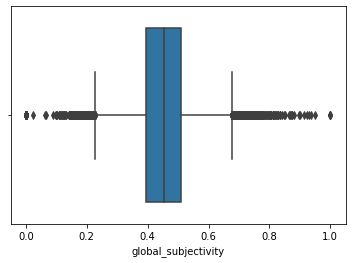

In [131]:
sns.boxplot(df['global_subjectivity'])

In [132]:
model = ols('shares~global_subjectivity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.41e-31
Time:                        15:02:54   Log-Likelihood:            -3.8150e+05
No. Observations:               39336   AIC:                         7.630e+05
Df Residuals:                   39334   BIC:                         7.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1878.9360     78.215     24.023      0.000    1725.633    2032.239
global_subjectivity  1977.9885    170.713     11.587      0.000    1643.386    2312.591
==============================================================================
Omnibus:                    33538.396   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           879926.672
Skew:                           4.141   Prob(JB):                         0.00
Kurtosis:                      24.640   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# p_value < 0.05
# H0 is accepted
# global_subjectivity is influencing

# 'global_sentiment_polarity' 

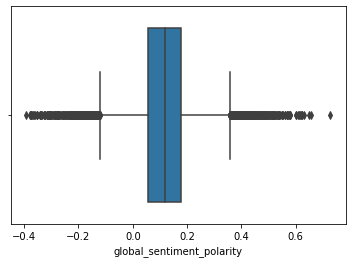

In [134]:
sns.boxplot(df['global_sentiment_polarity'])

In [135]:
model = ols('shares~global_sentiment_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00130
Time:                        15:02:54   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2676.4129     31.619     84.645      0.000    2614.438    2738.387
global_sentiment_polarity   662.2937    205.906      3.216      0.001     258.713    1065.874
==============================================================================
Omnibus:                    33614.955   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887419.454
Skew:                           4.153   Prob(JB):                         0.00
Kurtosis:                      24.736   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# p_value >  0.05
# H0 is accepted
# Global_sentiment polarity is not influencing

# 'global_rate_positive_words'

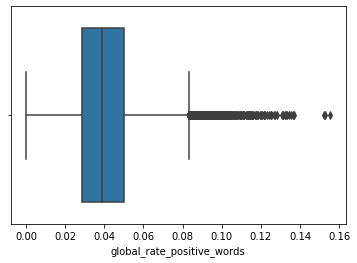

In [137]:
sns.boxplot(df['global_rate_positive_words'])

In [138]:
model = ols('shares~global_rate_positive_words',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.200
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0226
Time:                        15:02:55   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2652.1571     49.468     53.614      0.000    2555.199    2749.115
global_rate_positive_words  2605.5582   1142.629      2.280      0.023     365.979    4845.138
==============================================================================
Omnibus:                    33608.099   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886590.807
Skew:                           4.152   Prob(JB):                         0.00
Kurtosis:                      24.725   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# p_value >  0.05
# H0 is accepted
# global_rate_positive_words is not influencing

#  'global_rate_negative_words'

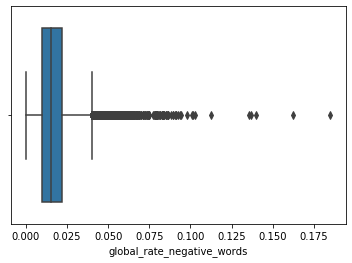

In [140]:
sns.boxplot(df['global_rate_negative_words'])

In [141]:
model = ols('shares~global_rate_negative_words',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.270
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00233
Time:                        15:02:55   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2662.4042     36.466     73.011      0.000    2590.931    2733.878
global_rate_negative_words  5600.8949   1839.571      3.045      0.002    1995.290    9206.500
==============================================================================
Omnibus:                    33567.784   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882766.157
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.676   Cond. No.                         92.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# p_value >  0.05
# H0 is accepted
# 'global_rate_negative_words' is not influencing

# 'rate_positive_words' 

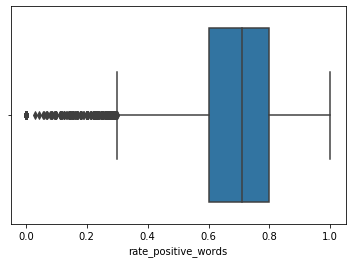

In [143]:
sns.boxplot(df['rate_positive_words'])

In [144]:
model = ols('shares~rate_negative_words',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.832
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00513
Time:                        15:02:55   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2858.2139     41.782     68.409      0.000    2776.321    2940.107
rate_negative_words  -357.0744    127.589     -2.799      0.005    -607.151    -106.997
==============================================================================
Omnibus:                    33614.117   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887352.613
Skew:                           4.153   Prob(JB):                         0.00
Kurtosis:                      24.735   Cond. No.                         6.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# p_value >  0.05
# H0 is accepted
# ''rate_negative_words'' is not influencing

#  'avg_positive_polarity

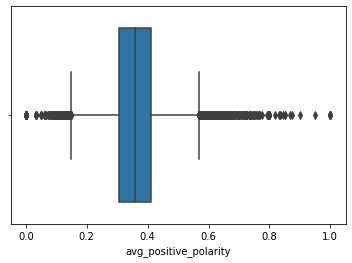

In [146]:
sns.boxplot(df['avg_positive_polarity'])

In [147]:
model = ols('shares~avg_positive_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     38.37
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.91e-10
Time:                        15:02:55   Log-Likelihood:            -3.8155e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2337.5923     70.328     33.239      0.000    2199.748    2475.436
avg_positive_polarity  1181.2786    190.702      6.194      0.000     807.499    1555.059
==============================================================================
Omnibus:                    33565.772   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882436.471
Skew:                           4.145   Prob(JB):                         0.00
Kurtosis:                      24.672   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# p_value <  0.05
# Ha is accepted
# 'avg_positive_polarity' is not influencing

# 'min_positive_polarity' 

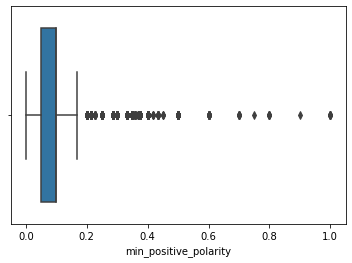

In [149]:
sns.boxplot(df['min_positive_polarity'])

In [150]:
model = ols('shares~min_positive_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.818
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0932
Time:                        15:02:56   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2710.6394     33.289     81.428      0.000    2645.392    2775.886
min_positive_polarity   469.3793    279.631      1.679      0.093     -78.705    1017.463
==============================================================================
Omnibus:                    33579.786   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883786.537
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      24.689   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# p_value >  0.05
# H0 is accepted
# 'min_positive_polarity' is not influencing

#  'max_positive_polarity'

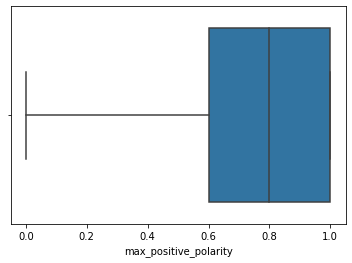

In [152]:
sns.boxplot(df['max_positive_polarity'])

In [153]:
model = ols('shares~max_positive_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.37
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.82e-05
Time:                        15:02:56   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2494.6843     64.007     38.975      0.000    2369.228    2620.140
max_positive_polarity   344.6056     80.401      4.286      0.000     187.018     502.193
==============================================================================
Omnibus:                    33594.850   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885320.008
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      24.709   Cond. No.                         6.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# p_value <  0.05
# Ha is accepted
# 'max_positive_polarity' is not influencing

#  'avg_negative_polarity'

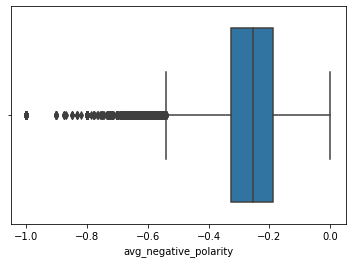

In [155]:
sns.boxplot(df['avg_negative_polarity'])

In [156]:
model = ols('shares~avg_negative_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     56.42
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.98e-14
Time:                        15:02:56   Log-Likelihood:            -3.8154e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2451.5738     45.082     54.380      0.000    2363.212    2539.935
avg_negative_polarity -1172.1420    156.053     -7.511      0.000   -1478.009    -866.275
==============================================================================
Omnibus:                    33538.098   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           880298.649
Skew:                           4.141   Prob(JB):                         0.00
Kurtosis:                      24.645   Cond. No.                         8.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# p_value <  0.05
# Ha is accepted
# 'avg_negative_polarity' is not influencing

#  'min_negative_polarity'

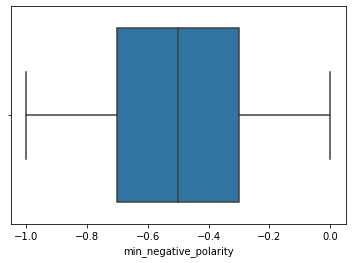

In [158]:
sns.boxplot(df['min_negative_polarity'])

In [159]:
model = ols('shares~min_negative_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.06
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.65e-06
Time:                        15:02:56   Log-Likelihood:            -3.8156e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2587.3266     40.955     63.176      0.000    2507.055    2667.598
min_negative_polarity  -322.3305     68.631     -4.697      0.000    -456.849    -187.812
==============================================================================
Omnibus:                    33572.356   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883259.961
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      24.683   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# p_value <  0.05
# Ha is accepted
# 'min_negative_polarity' is not influencing

# 'max_negative_polarity' 

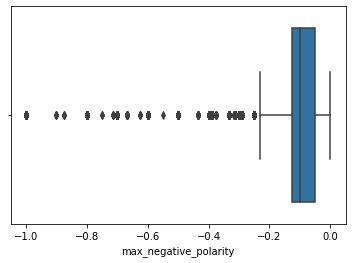

In [161]:
sns.boxplot(df['max_negative_polarity'])

In [162]:
model = ols('shares~max_negative_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.756
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0164
Time:                        15:02:56   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2701.5036     30.025     89.975      0.000    2642.654    2760.354
max_negative_polarity  -502.1395    209.301     -2.399      0.016    -912.375     -91.904
==============================================================================
Omnibus:                    33586.877   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884587.046
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      24.699   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
# p_value <  0.05
# Ha is accepted
# 'max_negative_polarity' is not influencing

# 'title_subjectivity' 

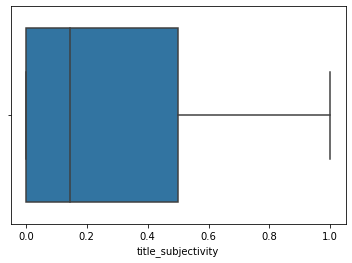

In [164]:
sns.boxplot(df['title_subjectivity' ])

In [165]:
model = ols('shares~title_subjectivity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     85.24
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.77e-20
Time:                        15:02:57   Log-Likelihood:            -3.8153e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2595.6306     26.368     98.440      0.000    2543.949    2647.312
title_subjectivity   566.9794     61.411      9.232      0.000     446.612     687.347
==============================================================================
Omnibus:                    33560.709   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883374.354
Skew:                           4.144   Prob(JB):                         0.00
Kurtosis:                      24.686   Cond. No.                         3.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
# p_value <  0.05
# Ha is accepted
# 'title_subjectivity' is  influencing

#  'title_sentiment_polarity'

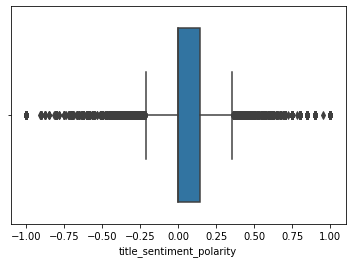

In [167]:
sns.boxplot(df['title_sentiment_polarity'])

In [168]:
model = ols('shares~title_sentiment_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.31
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.19e-10
Time:                        15:02:57   Log-Likelihood:            -3.8155e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2721.4633     20.610    132.044      0.000    2681.067    2761.860
title_sentiment_polarity   477.1768     75.161      6.349      0.000     329.859     624.494
==============================================================================
Omnibus:                    33605.027   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887148.222
Skew:                           4.151   Prob(JB):                         0.00
Kurtosis:                      24.733   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# p_value <  0.05
# Ha is accepted
# 'title_sentiment_polarity' is  influencing

#  'abs_title_subjectivity'

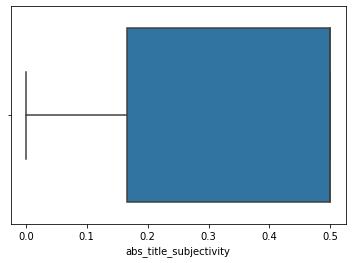

In [170]:
sns.boxplot(df['abs_title_subjectivity'])

In [171]:
model = ols('shares~abs_title_subjectivity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1051
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.746
Time:                        15:02:57   Log-Likelihood:            -3.8157e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.632e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2767.0985     41.177     67.201      0.000    2686.391    2847.806
abs_title_subjectivity   -34.1751    105.433     -0.324      0.746    -240.827     172.477
==============================================================================
Omnibus:                    33590.580   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884835.800
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      24.702   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# p_value >  0.05
# H0 is accepted
# 'abs_title_subjectivity' is not influencing

#  'abs_title_sentiment_polarity'

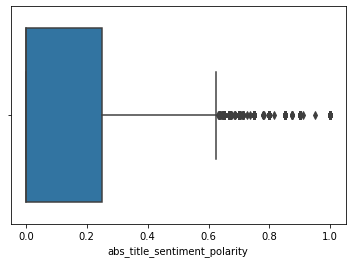

In [173]:
sns.boxplot(df['abs_title_sentiment_polarity'])

In [174]:
model = ols('shares~abs_title_sentiment_polarity',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     85.66
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.24e-20
Time:                        15:02:57   Log-Likelihood:            -3.8153e+05
No. Observations:               39336   AIC:                         7.631e+05
Df Residuals:                   39334   BIC:                         7.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2628.5788     24.157    108.814      0.000    2581.231    2675.926
abs_title_sentiment_polarity   815.3231     88.094      9.255      0.000     642.657     987.989
==============================================================================
Omnibus:                    33582.857   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886244.486
Skew:                           4.147   Prob(JB):                         0.00
Kurtosis:                      24.724   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# p_value <  0.05
# Ha is accepted
# 'abs_title_sentiment_polarity' is not influencing

In [176]:
df['popularity'] = pd.qcut(df['shares'], 4, labels = ['very low','low','high','very high'])

In [177]:
df.head()

,Unnamed:0,url,Date,ID,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days,popularity
0,0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,1,data_channel_is_entertainment,weekday_is_monday,very low
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,1,data_channel_is_bus,weekday_is_monday,very low
2,2,http://mashable.com/2013/01/07/apple-40-billio...,2013/01/07,appM3,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,0,0,1,0,0,0,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.857143,0.142857,0.323333,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1,data_channel_is_bus,weekday_is_monday,high
3,3,http://mashable.com/2013/01/07/astronaut-notre...,2013/01/07,astM4,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,0,1,0,0,0,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.666667,0.333333,0.100705,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,1,data_channel_is_entertainment,weekday_is_monday,low
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,2013/01/07,attM5,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,0,0,0,0,1,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.012127,0.860215,0.139785,0.281003,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,1,data_channel_is_tech,weekday_is_monday,very low


In [178]:
df['popularity'].describe()

count     39336
unique        4
top         low
freq      10247
Name: popularity, dtype: object

In [179]:
df[df['popularity']=='very low'].describe()

,Unnamed:0,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000
mean,20040.752517,351.209253,10.534520,518.258770,0.540271,0.972852,0.684932,9.466497,3.042705,3.815963,1.254296,4.574378,0.038129,0.248907,0.154448,0.017895,0.117641,0.306558,7.070056,21.436706,1050.555458,285.731573,11909.489070,757059.074733,253209.999549,944.126654,5165.463059,2850.943352,2623.344706,6736.773277,4185.749320,0.182410,0.212405,0.217590,0.207524,0.133401,0.019725,0.026945,0.046670,0.157236,0.168938,0.280013,0.209730,0.184084,0.432214,0.038105,0.017103,0.668947,0.303803,0.109252,0.349814,0.098522,0.743202,-0.259042,-0.520488,-0.107029,0.272543,0.052399,0.339834,0.145363,716.398068,0.953330
std,11509.751152,214.191378,2.099494,416.923161,0.133389,0.162523,0.150055,9.355615,3.480006,7.754632,4.213165,0.812319,0.191518,0.432402,0.361396,0.132578,0.322199,0.461088,1.930897,63.417747,4366.524919,670.725127,53443.382753,215545.118899,128601.541132,1016.418284,6049.330935,1210.506354,14764.525824,27027.796629,16998.082715,0.386202,0.409030,0.412628,0.405555,0.340025,0.139062,0.161930,0.210942,0.240398,0.246426,0.319374,0.288700,0.251713,0.112903,0.017315,0.011029,0.190461,0.162247,0.096255,0.102938,0.070582,0.245888,0.127402,0.290935,0.095101,0.315935,0.253592,0.189890,0.214295,171.864866,0.210942
min,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018182,0.018182,0.018183,0.018183,0.000000,0.000000,0.000000,0.000000,0.000000,-0.369336,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,10324.000000,149.000000,9.000000,246.000000,0.480612,1.000000,0.638327,4.000000,1.000000,1.000000,0.000000,4.495298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1.000000,425.000000,125.833333,0.000000,843300.000000,176102.833350,0.000000,3451.000000,2209.100478,509.500000,805.000000,772.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [180]:
df[df['popularity']=='low'].describe()

,Unnamed:0,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday
count,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000,10247.000000
mean,20662.834879,338.788914,10.446277,536.883478,0.533874,0.974236,0.677972,10.307114,3.287987,4.166195,1.170782,4.573061,0.051137,0.191763,0.166878,0.047624,0.178589,0.241632,7.113399,23.848639,1042.972651,291.948555,14277.953157,762359.149019,260783.134613,1079.951918,5247.117443,2996.137156,3344.083847,9125.638821,5567.119995,0.168537,0.189519,0.191275,0.179955,0.148726,0.052601,0.069386,0.121987,0.177892,0.146831,0.240581,0.201846,0.232850,0.438837,0.039108,0.016636,0.681085,0.292956,0.115903,0.351975,0.095608,0.749500,-0.258578,-0.521116,-0.107579,0.268072,0.061285,0.342944,0.147437,1171.023812,0.878013
std,11442.245314,213.713286,2.095424,437.132279,0.130577,0.158437,0.145958,10.300182,3.598875,7.959148,3.932690,0.793420,0.220288,0.393707,0.372885,0.212979,0.383026,0.428093,1.928859,67.048034,2697.694952,524.122244,64566.198063,200988.419057,132304.548670,1078.130103,4907.493108,1169.266414,18275.454225,37514.303600,23148.783627,0.374361,0.391939,0.393325,0.384169,0.355836,0.223246,0.254122,0.327287,0.256984,0.225092,0.297868,0.282531,0.287939,0.113122,0.017388,0.010773,0.187276,0.158101,0.097062,0.101286,0.069730,0.242544,0.126166,0.288715,0.094203,0.315691,0.254159,0.189300,0.215902,145.512922,0.327287
min,3.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.018182,0.018188,0.018182,0.018204,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,943.000000,0.000000
25%,10859.500000,153.000000,9.000000,252.000000,0.475488,1.000000,0.631472,4.000000,1.000000,1.000000,0.000000,4.486742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1.000000,442.000000,138.042143,0.000000,843300.000000,176933.750000,0.000000,3518.428349,2344.722625,651.500000,1000.000000,

In [181]:
df[df['popularity']=='high'].describe()

,Unnamed:0,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday
count,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.00000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000,9573.000000
mean,19366.385877,363.011595,10.311397,570.844981,0.524464,0.973049,0.667230,11.304502,3.455761,4.673979,1.153139,4.557611,0.059229,0.133083,0.170479,0.082210,0.239214,0.172882,7.308681,31.567325,1199.00081,327.383514,13443.710331,737129.342944,252395.420346,1146.926100,5588.315054,3139.296468,4057.919750,10648.249931,6479.901859,0.155228,0.173718,0.169644,0.177583,0.150945,0.089209,0.083673,0.172882,0.206435,0.121645,0.190060,0.205387,0.276472,0.447770,0.040609,0.016081,0.696418,0.276527,0.127702,0.355761,0.093712,0.767577,-0.254277,-0.513130,-0.106128,0.282933,0.083370,0.341597,0.157068,1964.399875,0.827118
std,11638.960252,218.609334,2.118628,498.189700,0.133653,0.161948,0.148857,11.355569,4.165412,8.065221,3.922775,0.809736,0.236065,0.339682,0.376073,0.274699,0.426626,0.378165,1.891346,75.729579,3681.33517,544.118590,57731.299541,229257.062684,137182.758628,1151.626848,5324.542272,1177.842905,20116.316464,42440.492483,24103.449876,0.362141,0.378886,0.375339,0.382181,0.358014,0.285060,0.276911,0.378165,0.276213,0.198470,0.259139,0.283321,0.309326,0.112718,0.017078,0.010372,0.183555,0.149436,0.093951,0.101826,0.071737,0.244135,0.122300,0.286868,0.090904,0.324363,0.263108,0.188769,0.226945,365.208565,0.378165
min,2.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018190,0.018182,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,-0.351289,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1500.000000,0.000000
25%,8464.000000,174.000000,9.000000,257.000000,0.463621,1.000000,0.619205,5.000000,1.000000,1.000000,0.000000,4.473846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1.000000,462.00000,154.222222,0.000000,690400.000000,163671.428600,0.000000,3575.026910,2433.457939,703.000000,1200.000000,1144.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [182]:
df[df['popularity']=='very high'].describe()

,Unnamed:0,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday
count,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.00000,9681.000000,9681.00000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000
mean,19119.245739,366.965706,10.283235,562.376511,0.595151,1.068588,0.727679,12.395310,3.405227,5.489619,1.400888,4.489831,0.063836,0.136246,0.140378,0.089040,0.211239,0.128602,7.405123,28.120339,1318.238970,344.638281,14784.36990,750817.239955,268786.81664,1295.502739,6571.438420,3535.865393,5840.089327,14486.549633,9185.781073,0.164033,0.169197,0.171263,0.168371,0.142134,0.087698,0.097304,0.185002,0.198932,0.126545,0.155088,0.272457,0.246874,0.454122,0.040766,0.016592,0.683362,0.277592,0.124745,0.357456,0.093661,0.766912,-0.264968,-0.531139,-0.108707,0.304692,0.088572,0.342925,0.173055,7286.085942,0.814998
std,11150.173397,209.602351,2.127772,522.831785,7.120800,10.582285,6.601660,13.515724,4.148500,9.267396,4.335529,0.946141,0.244474,0.343068,0.347397,0.284817,0.408208,0.334777,1.867654,71.913400,4311.374572,696.771309,55797.83563,212490.153679,140881.18923,1257.712416,7519.600282,1537.035099,24182.465887,51937.881005,30234.496312,0.370324,0.374946,0.376758,0.374215,0.349206,0.282869,0.296387,0.388319,0.275483,0.201189,0.226841,0.315859,0.298789,0.125580,0.017786,0.011082,0.197543,0.152244,0.098360,0.111166,0.072778,0.257101,0.133778,0.293596,0.100134,0.338612,0.286207,0.187540,0.244559,5930.969773,0.388319
min,8.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.00000,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.380208,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,2800.000000,0.000000
25%,9459.000000,186.000000,9.000000,232.000000,0.460067,1.000000,0.614780,4.000000,1.000000,1.000000,0.000000,4.458075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1.000000,463.000000,153.100000,0.00000,843300.000000,172983.33330,0.000000,3884.038062,2658.354567,774.000000,1400.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [183]:
df['is_weekday'] = (df['weekday_is_monday'] +  df['weekday_is_tuesday'] + df['weekday_is_wednesday'] + 
                   df['weekday_is_thursday'] + df['weekday_is_friday'])

In [184]:
df_1 = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus',
             'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

In [185]:
df['data_channel_type']=df_1.idxmax(axis=1)

In [186]:
df_2 = df[['weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]

In [187]:
# drop the old data
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)
print(df.shape)
df.head(n=4)

(39336, 56)


,Unnamed:0,url,Date,ID,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days,popularity
0,0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,Unpopular,1,data_channel_is_entertainment,weekday_is_monday,very low
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,Unpopular,1,data_channel_is_bus,weekday_is_monday,very low
2,2,http://mashable.com/2013/01/07/apple-40-billio...,2013/01/07,appM3,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.857143,0.142857,0.323333,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,Popular,1,data_channel_is_bus,weekday_is_monday,high
3,3,http://mashable.com/2013/01/07/astronaut-notre...,2013/01/07,astM4,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.666667,0.333333,0.100705,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,Unpopular,1,data_channel_is_entertainment,weekday_is_monday,low


In [188]:
df.to_csv("test2.csv") 

In [189]:
pd.crosstab(df['is_weekday'],df['popularity'])

popularity,very low,low,high,very high
is_weekday,,,,
0,459,1250,1655,1791
1,9376,8997,7918,7890


In [190]:
pd.crosstab(df['is_weekend'],df['popularity'])

popularity,very low,low,high,very high
is_weekend,,,,
0,9376,8997,7918,7890
1,459,1250,1655,1791


In [191]:
df['num_hrefs'].describe()

count    39336.000000
mean        10.853595
std         11.271423
min          0.000000
25%          4.000000
50%          7.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

In [192]:
pd.crosstab(df['num_hrefs'],df['popularity'])

popularity,very low,low,high,very high
num_hrefs,,,,
0,299,301,284,400
1,345,242,189,177
2,533,499,376,407
3,753,781,648,671
4,902,927,812,800
5,917,925,826,746
6,806,912,763,657
7,790,739,660,583
8,610,589,570,492


In [193]:
df[df['popularity']=='very high'].describe()

,Unnamed:0,AgeofPoast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday
count,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.00000,9681.000000,9681.00000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000
mean,19119.245739,366.965706,10.283235,562.376511,0.595151,1.068588,0.727679,12.395310,3.405227,5.489619,1.400888,4.489831,7.405123,28.120339,1318.238970,344.638281,14784.36990,750817.239955,268786.81664,1295.502739,6571.438420,3535.865393,5840.089327,14486.549633,9185.781073,0.185002,0.198932,0.126545,0.155088,0.272457,0.246874,0.454122,0.040766,0.016592,0.683362,0.277592,0.124745,0.357456,0.093661,0.766912,-0.264968,-0.531139,-0.108707,0.304692,0.088572,0.342925,0.173055,7286.085942,0.814998
std,11150.173397,209.602351,2.127772,522.831785,7.120800,10.582285,6.601660,13.515724,4.148500,9.267396,4.335529,0.946141,1.867654,71.913400,4311.374572,696.771309,55797.83563,212490.153679,140881.18923,1257.712416,7519.600282,1537.035099,24182.465887,51937.881005,30234.496312,0.388319,0.275483,0.201189,0.226841,0.315859,0.298789,0.125580,0.017786,0.011082,0.197543,0.152244,0.098360,0.111166,0.072778,0.257101,0.133778,0.293596,0.100134,0.338612,0.286207,0.187540,0.244559,5930.969773,0.388319
min,8.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.00000,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.380208,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,2800.000000,0.000000
25%,9459.000000,186.000000,9.000000,232.000000,0.460067,1.000000,0.614780,4.000000,1.000000,1.000000,0.000000,4.458075,6.000000,-1.000000,463.000000,153.100000,0.00000,843300.000000,172983.33330,0.000000,3884.038062,2658.354567,774.000000,1400.000000,1300.000000,0.000000,0.025022,0.025006,0.025016,0.028572,0.028572,0.410526,0.030100,0.009585,0.611111,0.181818,0.065755,0.311616,0.033333,0.600000,-0.336111,-0.750000,-0.125000,0.000000,0.000000,0.166667,0.000000,3500.000000,1.000000
50%,19084.000000,353.000000,10.000000,398.000000,0.536364,1.000000,0.682796,8.000000,3.000000,1.000000,0.000000,4.639706,7.000000,-1.000000,712.000000,250.833333,1900.00000,843300.000000,254642.85710,1295.200000,5160.230769,3268.038302,1600.000000,4100.000000,3200.000000,0.000000,0.033368,0.033337,0.033354,0.050001,0.040348,0.466539,0.040650,0.015273,0.714286,0.269231,0.126209,0.366381,0.100000,0.800000,-0.259656,-0.500000,-0.100000,0.200000,0.000000,0.500000,0.033333,5000.000000,1.000000
75%,28341.000000,552.000000,12.000000,748.000000,0.611607,1.000000,0.752066,16.000000,4.000000,9.000000,1.000000,4.828660,9.000000,4.000000,1100.000000,378.833333,11200.00000,843

In [194]:
from sklearn.preprocessing import RobustScaler
x = df.drop(columns = ['popularity', 'data_channel_type'])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39336 entries, 0 to 39335
Data columns (total 56 columns):
Unnamed:0                       39336 non-null int64
url                             39336 non-null object
Date                            39336 non-null object
ID                              39336 non-null object
AgeofPoast                      39336 non-null int64
n_tokens_title                  39336 non-null int64
n_tokens_content                39336 non-null int64
n_unique_tokens                 39336 non-null float64
n_non_stop_words                39336 non-null float64
n_non_stop_unique_tokens        39336 non-null float64
num_hrefs                       39336 non-null int64
num_self_hrefs                  39336 non-null int64
num_imgs                        39336 non-null int64
num_videos                      39336 non-null int64
average_token_length            39336 non-null float64
num_keywords                    39336 non-null int64
kw_min_min                      

In [196]:
rs = RobustScaler()

df_new = rs.fit_transform(x)

ValueError: could not convert string to float: 'http://mashable.com/2013/01/07/amazon-instant-video-browser/'

In [ ]:
df_new = pd.DataFrame(df_new, columns = [  'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'global_sentiment_polarity',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'])

In [ ]:
df_new.head()

In [ ]:
df.columns